# Практикум №2

## Задача 1

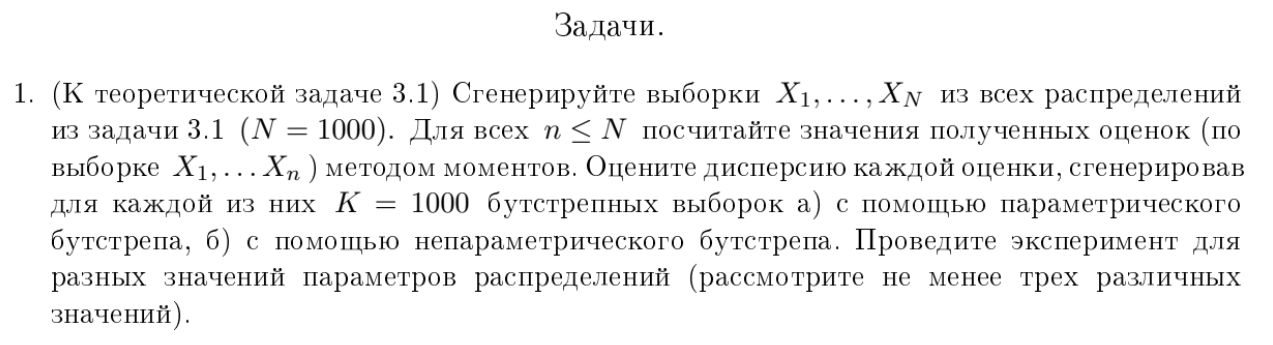

In [1]:
import scipy.stats as sts
import numpy as np
import math

In [2]:
alpha = 1
mu = 2
n = 100
p = 0.3
a = 3
b = 13

In [3]:
samples = np.array([sts.norm().rvs(1000),
                    sts.gamma(alpha).rvs(1000),
                    sts.uniform().rvs(1000),
                    sts.poisson(mu).rvs(1000),
                    sts.binom(n, p).rvs(1000),
                    sts.geom(p).rvs(1000),
                    sts.beta(a, b).rvs(1000)])

In [4]:
samples.shape[0]

7

In [5]:
def compute_estimation(sample, f):
#     f_vec = np.vectorize(f, excluded=['sample'])
    res = []
    for i in range(2, sample.size + 1):
        res.append(f(i, sample))
    return  res

def f0(i, x):
    return x[:i].mean()

def f1(i, x):
    return (x[:i].mean() / x[:i].var(), x[:i].mean() ** 2 / x[:i].var())

def f2(i, x):
    return (x[:i].mean() - 3 ** 0.5 * x[:i].var(), x[:i].mean() + 3 ** 0.5 * x[:i].var())

def f3(i, x):
    return x[:i].mean()

def f4(i, x):
    return (x[:i].mean() ** 2 / (x[:i].mean() - x[:i].var()), 1 - x[:i].var()/x[:i].mean())

def f5(i, x):
    return 1 / x[:i].mean()

def f6(i, x):
    return ((x[:i].mean() - (x[:i] ** 2).mean()) / ((x[:i] ** 2).mean() - 2 * x[:i].mean() + 1),
                  (x[:i].mean() - (x[:i] ** 2).mean()) * (1 - x[:i].mean()) \
                  / ((x[:i] ** 2).mean() - 2 * x[:i].mean() + 1) / x[:i].mean())

# f = np.array([
#     lambda i, x: x[:i].mean(),
#     lambda i, x: (x[:i].mean() / x[:i].var(), x[:i].mean() ** 2 / x[:i].var()),
#     lambda i, x: (x[:i].mean() - 3 ** 0.5 * x[:i].var(), x[:i].mean() + 3 ** 0.5 * x[:i].var()),
#     lambda i, x: x[:i].mean(),
#     lambda i, x: (x[:i].mean() ** 2 / (x[:i].mean() - x[:i].var()), 1 - x[:i].var()/x[:i].mean()),
#     lambda i, x: 1 / x[:i].mean(),
#     lambda i, x: ((x[:i].mean() - (x[:i] ** 2).mean()) / ((x[:i] ** 2).mean() - 2 * x[:i].mean() + 1),
#                   (x[:i].mean() - (x[:i] ** 2).mean()) * (1 - x[:i].mean()) \
#                   / ((x[:i] ** 2).mean() - 2 * x[:i].mean() + 1) / x[:i].mean())
# ])
f = [f0, f1, f2, f3, f4, f5, f6]

method_of_moments_values = [[]] * 7
for idx, sample in enumerate(samples):
    method_of_moments_values[idx] = compute_estimation(sample, f[idx])
    

In [6]:
from sklearn import cross_validation
bs = cross_validation.Bootstrap(9, random_state=0)
len(bs)
print(bs)

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\gonch\Anaconda3\lib\site-packages\sklearn\__init__.py)